## Option Chain Analysis for AAPL Stock
In this notebook, we analyze the option chain for Apple Inc. (ticker symbol: AAPL) using the `yfinance` library to fetch data and `matplotlib` to visualize it.

---

### Import Required Libraries
We'll start by importing the necessary libraries: `yfinance` for fetching financial data, `pandas` for data manipulation, and `matplotlib` for visualization.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

### Set Ticker Symbol
Define the ticker symbol for the stock you want to analyze options for (in this case, 'AAPL' for Apple Inc.).

In [2]:
ticker_symbol = 'AAPL'

### Fetch Ticker Data
Fetch the stock data using yfinance's Ticker method.

In [3]:
ticker = yf.Ticker(ticker_symbol)

### Get Expiration Dates for Options
Obtain all available expiration dates for the options of the specified ticker.

In [4]:
expiration_dates = ticker.options

### Initialize an Empty DataFrame for the Option Chain
Create an empty DataFrame to store the options data across all expiration dates.

In [5]:
option_chain = pd.DataFrame()

### Loop Through Expiration Dates to Collect Option Data
For each expiration date, fetch the option chain data and add relevant details.

In [6]:
for expiry in expiration_dates:
    options = ticker.option_chain(expiry)
    calls = options.calls
    calls['Type'] = 'Call'
    calls['Expiration Date'] = expiry
    puts = options.puts
    puts['Type'] = 'Put'
    puts['Expiration Date'] = expiry
    option_chain = pd.concat([option_chain, calls, puts], ignore_index=True)

### Reset Index of DataFrame
Reset the index of the DataFrame for cleaner presentation of data.

In [7]:
option_chain.reset_index(drop=True, inplace=True)

### Debugging: Display Initial Option Chain Data
Print the first 5 rows of the option chain to confirm data retrieval.

In [8]:
print('Option Chain Data (First 5 rows):')
print(option_chain.head())

Option Chain Data (First 5 rows):
        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  AAPL241101C00100000 2024-10-28 13:30:03+00:00   100.0     133.50  134.05   
1  AAPL241101C00105000 2024-10-23 17:41:10+00:00   105.0     124.76  128.95   
2  AAPL241101C00120000 2024-10-17 14:24:10+00:00   120.0     112.65  113.95   
3  AAPL241101C00130000 2024-10-25 15:45:29+00:00   130.0     102.22  104.25   
4  AAPL241101C00135000 2024-10-23 18:44:28+00:00   135.0      94.53   99.05   

      ask    change  percentChange  volume  openInterest  impliedVolatility  \
0  134.90 -2.889999      -2.118923     2.0             3           3.589845   
1  129.65  0.000000       0.000000     1.0             5           3.191408   
2  114.65  0.000000       0.000000     NaN            15           2.703128   
3  104.80  0.000000       0.000000     3.0             3           2.615238   
4   99.95  0.000000       0.000000     NaN             3           2.447270   

   inTheMoney co

### Handle Missing Price Data
Check for the presence of a 'lastPrice' column. If missing, use 'bid' or 'ask' prices as fallback.

In [9]:
if 'lastPrice' not in option_chain.columns:
    if 'bid' in option_chain.columns:
        option_chain['lastPrice'] = option_chain['bid']
    elif 'ask' in option_chain.columns:
        option_chain['lastPrice'] = option_chain['ask']
    else:
        print('No suitable price column found. Ensure that the option data is available.')
        raise ValueError('No price data available')

### Filter Data: Remove Zero or NaN Values
Drop rows where 'strike' or 'lastPrice' are zero or NaN for accurate analysis.

In [10]:
option_chain = option_chain.dropna(subset=['strike', 'lastPrice'])
option_chain = option_chain[(option_chain['strike'] > 0) & (option_chain['lastPrice'] > 0)]

### Debugging: Display Filtered Option Chain Data
Display the first 5 rows of the filtered data to confirm validity.

In [11]:
print('\nFiltered Option Chain Data (First 5 rows):')
print(option_chain.head())


Filtered Option Chain Data (First 5 rows):
        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  AAPL241101C00100000 2024-10-28 13:30:03+00:00   100.0     133.50  134.05   
1  AAPL241101C00105000 2024-10-23 17:41:10+00:00   105.0     124.76  128.95   
2  AAPL241101C00120000 2024-10-17 14:24:10+00:00   120.0     112.65  113.95   
3  AAPL241101C00130000 2024-10-25 15:45:29+00:00   130.0     102.22  104.25   
4  AAPL241101C00135000 2024-10-23 18:44:28+00:00   135.0      94.53   99.05   

      ask    change  percentChange  volume  openInterest  impliedVolatility  \
0  134.90 -2.889999      -2.118923     2.0             3           3.589845   
1  129.65  0.000000       0.000000     1.0             5           3.191408   
2  114.65  0.000000       0.000000     NaN            15           2.703128   
3  104.80  0.000000       0.000000     3.0             3           2.615238   
4   99.95  0.000000       0.000000     NaN             3           2.447270   

   inT

### Set Expiration Date for Visualization
Define the expiration date for which to visualize option prices. If it’s not available, use the first date.

In [12]:
exp_date = '2024-12-27'
if exp_date not in expiration_dates:
    print(f'Specified expiration date {exp_date} not available. Using the first available expiration date.')
    exp_date = expiration_dates[0]

Specified expiration date 2024-12-27 not available. Using the first available expiration date.


### Filter Data for the Specified Expiration Date
Filter the option chain to only include data for the selected expiration date.

In [13]:
exp_chain = option_chain[option_chain['Expiration Date'] == exp_date]

### Plot Call and Put Prices Against Strike Price
Check if data exists for the selected expiration date; if yes, plot the data.

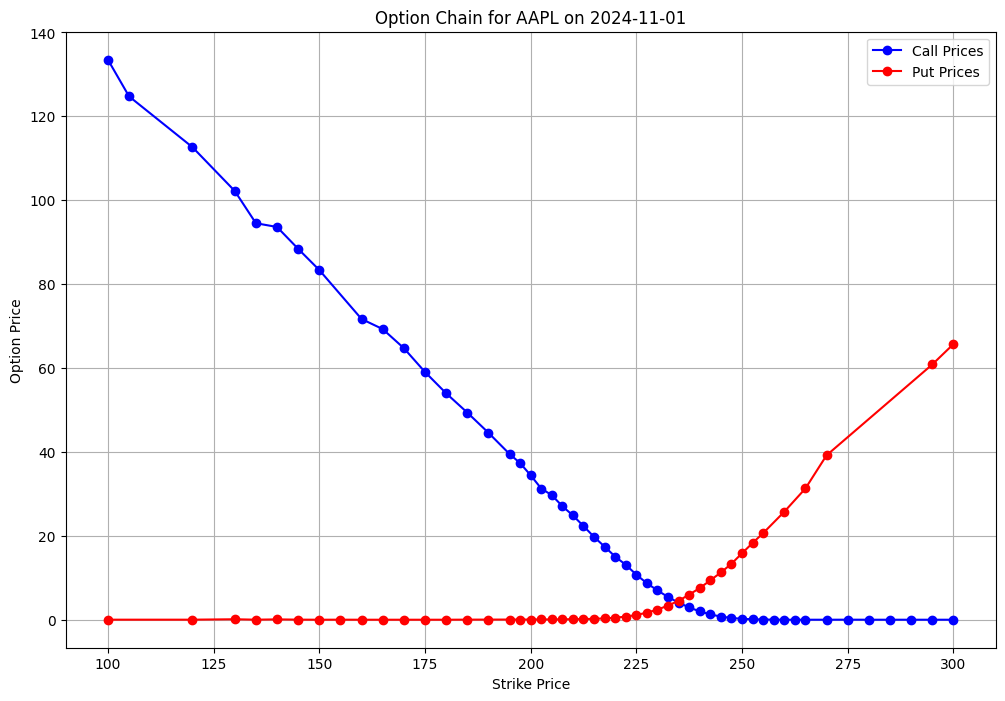

In [14]:
if exp_chain.empty:
    print(f'No data available for expiration date {exp_date}. Please choose a different date.')
else:
    plt.figure(figsize=(12, 8))
    if not exp_chain[exp_chain['Type'] == 'Call'].empty:
        plt.plot(exp_chain[exp_chain['Type'] == 'Call']['strike'], 
                 exp_chain[exp_chain['Type'] == 'Call']['lastPrice'], 
                 label='Call Prices', marker='o', linestyle='-', color='blue')
    if not exp_chain[exp_chain['Type'] == 'Put'].empty:
        plt.plot(exp_chain[exp_chain['Type'] == 'Put']['strike'], 
                 exp_chain[exp_chain['Type'] == 'Put']['lastPrice'], 
                 label='Put Prices', marker='o', linestyle='-', color='red')
    plt.xlabel('Strike Price')
    plt.ylabel('Option Price')
    plt.title(f'Option Chain for {ticker_symbol} on {exp_date}')
    plt.legend()
    plt.grid(True)
    plt.show()